<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/colab/Miniproject1_DataUnderstanding_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mental Health in Tech Survey.zip to Mental Health in Tech Survey.zip


In [3]:
!unzip "Mental Health in Tech Survey.zip"

Archive:  Mental Health in Tech Survey.zip
  inflating: Mental Health in Tech Survey/survey.csv  


In [4]:
# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv("Mental Health in Tech Survey/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


# New Section

In [9]:
#deleting misprint in ages
print(df['Age'].nlargest(5))
print(df['Age'].nsmallest(8))

390     99999999999
364             329
1182             72
560              65
520              62
Name: Age, dtype: int64
715    -1726
143      -29
1127      -1
734        5
989        8
1090      11
43        18
93        18
Name: Age, dtype: int64


In [11]:
df.loc[
    df['Age'].isin(
        pd.concat([df['Age'].nsmallest(6), df['Age'].nlargest(2)])
    ),
    :
]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [12]:
#removing mistakes in age
ages_to_remove = pd.concat([
    df['Age'].nsmallest(6),
    df['Age'].nlargest(2)
])
print(ages_to_remove)
df = df.loc[
    ~df['Age'].isin(ages_to_remove),
    :
]

715           -1726
143             -29
1127             -1
734               5
989               8
1090             11
390     99999999999
364             329
Name: Age, dtype: int64


In [14]:
print(f"Gender: {len(df['Gender'].unique())}")
print(f"Gender: {df['Gender'].unique()}")

print(df.groupby('Gender').size())

Gender: 46
Gender: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']
Gender
Agender                                             1
Androgyne                                           1
Cis Female                                          1
Cis Male                                            2
Cis Man                                             1
Enby                                                1
F                                                  38
Femake                                              1
Female         

In [15]:

gender_mapping = {
    'Female': 'Female',
    'Female ': 'Female',
    'female': 'Female',
    'femake': 'Female',
    'femail': 'Female',
    'F':      'Female',
    'f':      'Female',
    'Woman':  'Female',
    'Woman ': 'Female',
    'woman':  'Female',
    'Male':   'Male',
    'Make':   'Male',
    'Malr':   'Male',
    'Male ':  'Male',
    'male':   'Male',
    'msle':   'Male',
    'Man':    'Male',
    'M':      'Male',
    'm':      'Male'
}
df['Gender'] = df['Gender'].map(gender_mapping)
df['Gender'].value_counts()

,count
Gender,
Male,977
Female,243


In [17]:

print(f"Genders: {len(df['Gender'].unique())}")
print(f"Gender: {df['Gender'].unique()}")
print(df['Gender'].isna().value_counts())

Genders: 3
Gender: ['Female' 'Male' nan]
Gender
False    1220
True       31
Name: count, dtype: int64


In [18]:
#deleting rows with strange gender
df = df.dropna(subset=['Gender'])

In [19]:
df.shape

(1220, 27)

In [20]:
#  CREATE AGE GROUPS
bins = [ 18, 35, 60, 100]
labels = [ 'Young Adult', 'Middle Aged', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df['age_group'].value_counts())

age_group
Young Adult    888
Middle Aged    322
Senior           4
Name: count, dtype: int64


In [22]:

#What is the distribution of mental health conditions among different age groups in the tech industry?
mental_health_by_age = df.groupby(['age_group','mental_health_consequence']).size().unstack()
mental_health_by_age

/tmp/ipython-input-4035287317.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_by_age = df.groupby(['age_group','mental_health_consequence']).size().unstack()


mental_health_consequence,Maybe,No,Yes
age_group,,,
Young Adult,335,367,186
Middle Aged,125,111,86
Senior,3,0,1


In [23]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'age_group'],
      dtype='object')

In [24]:
mental_health_by_age = mental_health_by_age.reindex(
    columns=['No','Maybe','Yes']
)

mental_health_percent = mental_health_by_age.div(
    mental_health_by_age.sum(axis=1),
    axis=0
) * 100

***What is the distribution of mental health conditions among different age groups in the tech industry?***

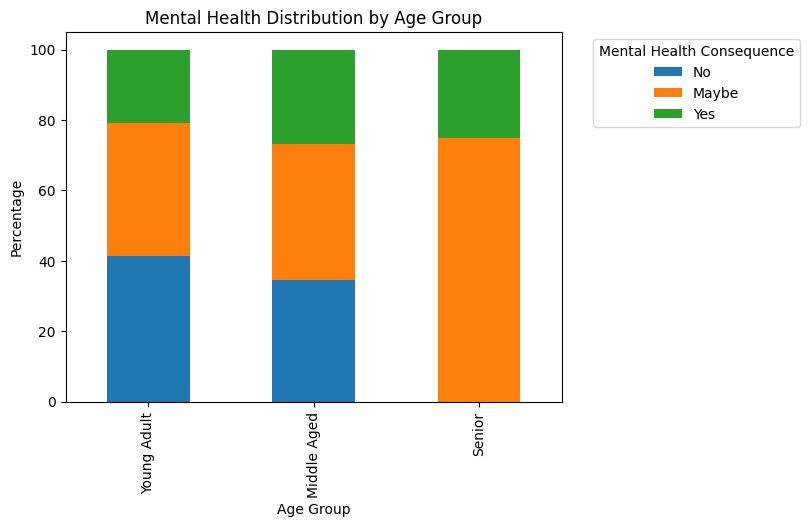

In [25]:

mental_health_percent.plot(kind='bar', stacked=True)
plt.title("Mental Health Distribution by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(title="Mental Health Consequence",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

In [26]:
#How does the frequency of mental health issues vary by gender?
mental_health_by_gender = df.groupby(['Gender','mental_health_consequence']).size().unstack()
mental_health_by_gender

mental_health_consequence,Maybe,No,Yes
Gender,,,
Female,106,72,65
Male,358,408,211


In [27]:
mental_health_by_gender = mental_health_by_gender.reindex(
    columns=['No','Maybe','Yes']
)

mental_health_gender_percent = mental_health_by_gender.div(
    mental_health_by_gender.sum(axis=1),
    axis=0
) * 100

***How does the frequency of mental health issues vary by gender?***

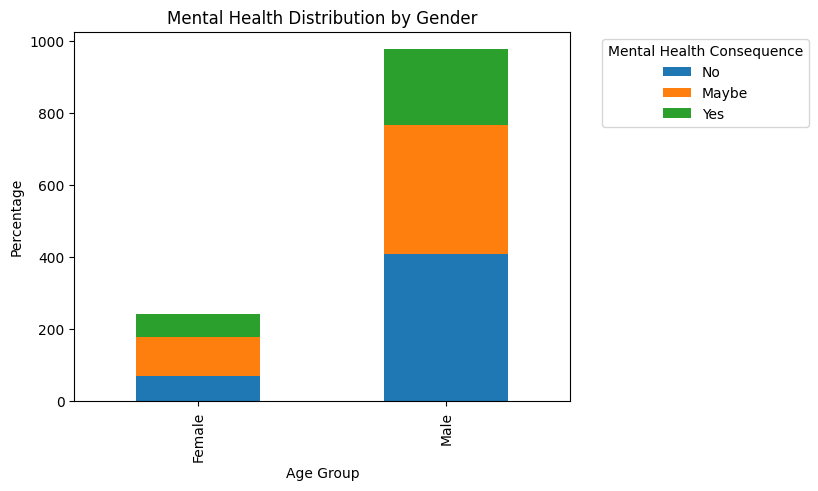

In [36]:
mental_health_by_gender.plot(kind='bar', stacked=True)
plt.title("Mental Health Distribution by Gender")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(title="Mental Health Consequence",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

In [45]:
#Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

country_mental_health_consequence = df[df['mental_health_consequence'] == 'Yes'] \
                 .groupby('Country')['mental_health_consequence'] \
                 .count()

#df.groupby('Country')['mental_health_consequence'].value_counts().loc[:, 'Yes']
print(country_mental_health_consequence.sort_values(ascending=False).head(9))
print(country_mental_health_consequence.sort_values(ascending=True).head(16))

Country
United States     163
United Kingdom     39
Canada             14
Ireland            11
Australia           8
Germany             5
Netherlands         4
India               4
New Zealand         4
Name: mental_health_consequence, dtype: int64
Country
Bulgaria        1
France          1
Croatia         1
Colombia        1
Italy           1
Israel          1
Hungary         1
Georgia         1
South Africa    1
Spain           1
Switzerland     1
Slovenia        1
Portugal        1
Russia          1
Philippines     1
Japan           1
Name: mental_health_consequence, dtype: int64


In [39]:
#If there are not enough answers, the calculation is meaningless
country_counts = df['Country'].value_counts()
enough_reports = 3
valid_countries = country_counts[country_counts >= enough_reports].index
valid_countries


Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Netherlands',
       'Ireland', 'Australia', 'France', 'India', 'New Zealand', 'Sweden',
       'Switzerland', 'Poland', 'Brazil', 'Belgium', 'South Africa', 'Italy',
       'Israel', 'Singapore', 'Bulgaria', 'Mexico', 'Austria', 'Finland'],
      dtype='object', name='Country')

In [40]:
# Filter countries with enough responses

# filtered_yes = country_mental_health_consequence.loc[valid_countries]
filtered_yes = country_mental_health_consequence.reindex(valid_countries, fill_value=0)
#print(f"Countries with responce 'mental_health_consequence=Yes' {filtered_yes}")

filtered_total = df.groupby('Country')['mental_health_consequence'].count().loc[valid_countries]
#print(f'Total responces for {filtered_total}')

# Compute percentages
country_mental_health_consequence_rate = (filtered_yes / filtered_total).round(2)
print(f'Countries rates of mental health issues: {country_mental_health_consequence_rate}')

# Find highest and lowest
max_country = country_mental_health_consequence_rate.idxmax()
min_country = country_mental_health_consequence_rate.idxmin()

print("\nHighest:", max_country, country_mental_health_consequence_rate[max_country])
print("Lowest:", min_country, country_mental_health_consequence_rate[min_country])


Countries rates of mental health issues: Country
United States     0.22
United Kingdom    0.22
Canada            0.20
Germany           0.12
Netherlands       0.15
Ireland           0.41
Australia         0.38
France            0.08
India             0.40
New Zealand       0.50
Sweden            0.00
Switzerland       0.14
Poland            0.00
Brazil            0.00
Belgium           0.33
South Africa      0.17
Italy             0.17
Israel            0.20
Singapore         0.50
Bulgaria          0.25
Mexico            0.00
Austria           0.00
Finland           0.67
Name: mental_health_consequence, dtype: float64

Highest: Finland 0.67
Lowest: Sweden 0.0


***Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.***

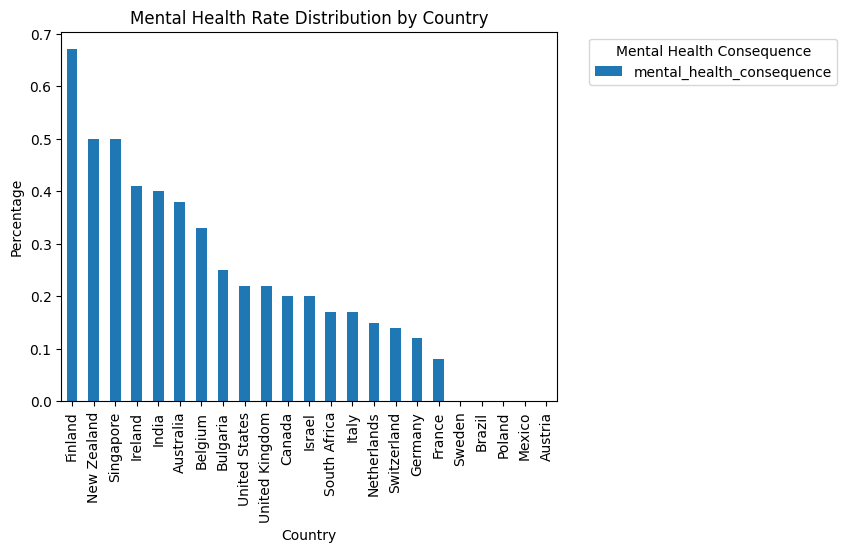

In [47]:
country_sorted = country_mental_health_consequence_rate.sort_values(ascending=False)

country_sorted.plot(kind='bar', stacked=True)

plt.title("Mental Health Rate Distribution by Country")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.legend(title="Mental Health Consequence",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()